<a href="https://colab.research.google.com/github/sheldonkemper/portfolio/blob/main/CAM_DS_C301_W6_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 6.5 Preparing for time series analysis in Python

## Scenario
The Baltimore Police Department (BPD), situated in Baltimore, USA, created a data set containing crime records from 1 January 2011 to 18 June 2016. Although the data set is considered preliminary and subject to change, it contains 264,496 rows and 11 columns (BPD, 2024).

For this activity, the data set was adapted to indicate the number of daily crime incidents from 1 January 2011 to 31 December 2015. Therefore, the data set contains 2,143 rows and 2 columns. You are tasked to analyse the provided data set to determine visible crime trends. You must also provide a clear and precise rationale for your analysis and findings.


## Objective
In this portfolio activity, you will analyse a time series data set to gain insights into crime trends.

You will complete the activity in your Notebook, where you will:
- preprocess the data
- visualise the data
- calculate and compare ACF and PACF
- transform and decompose the data
- perform statistical analysis
- present your insights based on statistical tests and visualisations.


## Assessment criteria
By completing this activity, you will be able to provide evidence that you can:
- Synthesise autocorrelation and stationarity concepts and define their importance in time series analysis.
- Recognise white noise, identify random walk behaviour processes in time series, and apply statistical tests for model diagnostics.
- Accurately perform time series decomposition, including seasonality, trend, and residual components, and apply transformations to make time series stationary.
- Critically evaluate the effectiveness of time series analysis to address real-world problems.



## Activity guidance
1. Import the relevant libraries for data analysis and visualisation.
2. Explore and preprocess the data set.
3. Preprocess the data, handling missing values and encoding categorical variables as needed.
4. Handle missing values and compare results.
5. Create a new DataFrame with weekly-grouped daily-average and visualise the data.
6.  Calculate the ACF and PACF with 1% insignificance region around zero of monthly data. Thereafter, interpret the output.
7. Determine if data should be transformed.
8. Decompose the data and determine the STL residuals. Store the residuals as `stl_object.resid`.
9. Apply Ljung-Box and ADF tests on the data.
10. Provide a clear and precise rationale for your data analysis and interpretation.

In [117]:
# Import required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rc
from statsmodels.tsa.seasonal import STL
from scipy.stats import boxcox
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

functions

In [118]:
from datetime import datetime
# Function to format dates
def format_dates(date_list):
    formatted_dates = []
    for date in date_list:
        if len(date.split('-')[2]) == 2:  # If year is two digits
            formatted_date = datetime.strptime(date, '%m-%d-%y').strftime('%Y-%m-%d')
        else:  # If year is four digits
            formatted_date = datetime.strptime(date, '%m-%d-%Y').strftime('%Y-%m-%d')
        formatted_dates.append(formatted_date)
    return formatted_dates

In [119]:
# Import data set from GitHub repository:
# url = 'https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/crime_incidents.csv'
data = pd.read_csv('https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/crime_incidents.csv') #
data.head()

,date,incidents
0,01-01-11,185.0
1,01-01-12,176.0
2,01-01-13,157.0
3,01-01-14,139.0
4,01-01-15,157.0


# **Step 1: Convert date to datetime format and set it as the index**

In [120]:
# Get all distinct dates in the dataset
distinct_dates = data['date'].unique()

# Print the distinct dates
print(distinct_dates)

# Optionally, if you want the dates sorted in ascending order
sorted_dates = sorted(distinct_dates)
print(sorted_dates)


['01-01-11' '01-01-12' '01-01-13' ... '12/31/2013' '12/31/2014'
 '12/31/2015']
['01-01-11', '01-01-12', '01-01-13', '01-01-14', '01-01-15', '01-01-16', '01-02-11', '01-02-12', '01-02-13', '01-02-14', '01-02-15', '01-02-16', '01-03-11', '01-03-12', '01-03-13', '01-03-14', '01-03-15', '01-03-16', '01-04-11', '01-04-12', '01-04-13', '01-04-14', '01-04-15', '01-04-16', '01-05-11', '01-05-12', '01-05-13', '01-05-14', '01-05-15', '01-05-16', '01-06-11', '01-06-12', '01-06-13', '01-06-14', '01-06-15', '01-06-16', '01-07-11', '01-07-12', '01-07-13', '01-07-14', '01-07-15', '01-07-16', '01-08-11', '01-08-12', '01-08-13', '01-08-14', '01-08-15', '01-08-16', '01-09-11', '01-09-12', '01-09-13', '01-09-14', '01-09-15', '01-09-16', '01-10-11', '01-10-12', '01-10-13', '01-10-14', '01-10-15', '01-10-16', '01-11-11', '01-11-12', '01-11-13', '01-11-14', '01-11-15', '01-11-16', '01-12-11', '01-12-12', '01-12-13', '01-12-14', '01-12-15', '01-12-16', '01/13/2011', '01/13/2012', '01/13/2013', '01/13/2014', 

In [121]:
data['date'] = data['date'].str.replace(r'[-/]', '-', regex=True)

In [122]:
import pandas as pd

# Assuming `data` is a dictionary with multiple fields including 'date'

# Format the 'date' field
data['date'] = format_dates(data['date'])

# Create a DataFrame from the updated `data` dictionary
df = pd.DataFrame(data)

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Display the updated DataFrame
print(df.head())


            incidents
date                 
2011-01-01      185.0
2012-01-01      176.0
2013-01-01      157.0
2014-01-01      139.0
2015-01-01      157.0


# **Step 2: Visualise the data**




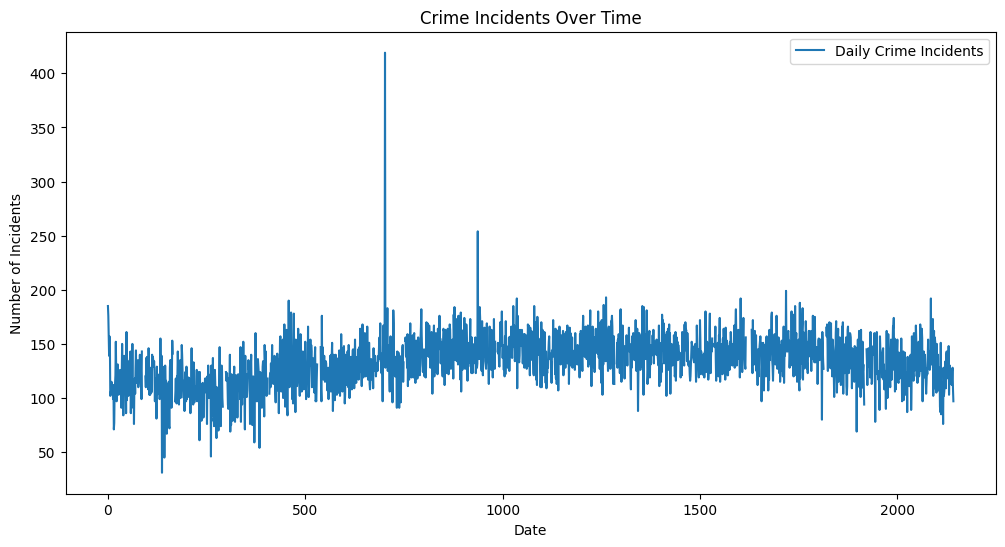

In [123]:
import matplotlib.pyplot as plt

# Plot the data to observe trends and seasonality
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['incidents'], label='Daily Crime Incidents')
plt.title('Crime Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()


# **Step 3: Check for missing or irregular values**

In [124]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Display basic statistics
print(data.describe())


Missing values:
 date          0
incidents    74
dtype: int64
         incidents
count  2069.000000
mean    133.571290
std      22.940221
min      31.000000
25%     120.000000
50%     134.000000
75%     148.000000
max     419.000000


## Dropping the rows with missing values

In [125]:
# Drop rows with missing values in the 'incidents' column
data.dropna(subset=['incidents'], inplace=True)

# Verify there are no missing values left
print(data.isnull().sum())

# Check the updated shape of the dataset
print(f"Updated dataset shape: {data.shape}")


date         0
incidents    0
dtype: int64
Updated dataset shape: (2069, 2)



# **Step 4: Calculate ACF and PACF**

# Reflect

Write a brief paragraph highlighting your process and the rationale to showcase critical thinking and problem-solving.

> Select the pen from the toolbar to add your entry.

### Reference
BPD, 2024. Baltimore Crime Data. [online]. Available at: <https://data.world/baltimore/baltimore-crime-data>. [Accessed 5 March 2024].  